# Masks generation

The porpuses of this notebook is to show how to generate ocean masks for different regions. It uses functions genBasinMasks.

In [1]:
from mom6_tools.m6plot import xyplot
from mom6_tools.m6toolbox import genBasinMasks 
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.DiagsCase import DiagsCase
import yaml
import numpy 
import xarray as xr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read in the yaml file
diag_config_yml_path = "diag_config.yml"
diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

In [3]:
# Read in the yaml file
diag_config_yml_path = "diag_config.yml"
diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

# Create the case instance
dcase = DiagsCase(diag_config_yml['Case'])
DOUT_S = dcase.get_value('DOUT_S')
if DOUT_S:
  OUTDIR = dcase.get_value('DOUT_S_ROOT')+'/ocn/hist/'
else:
  OUTDIR = dcase.get_value('RUNDIR')

print('Output directory is:', OUTDIR)
print('Casename is:', dcase.casename)

Output directory is: /glade/scratch/gmarques/archive/g.e23_b15.GJRAv4.TL319_t232_zstar_N65.baseline.001/ocn/hist/
Casename is: g.e23_b15.GJRAv4.TL319_t232_zstar_N65.baseline.001


In [4]:
# read grid info
grd = MOM6grid(OUTDIR+'/'+dcase.casename+diag_config_yml['Fnames']['static'])
try:
  depth = grd.depth_ocean
except:
  depth = grd.deptho
# remote Nan's, otherwise genBasinMasks won't work
depth[numpy.isnan(depth)] = 0.0

MOM6 grid successfully loaded... 



### Create masks for different regions

In [5]:
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth)

### Check and plot code number for each region defined

In [6]:
vals = numpy.unique(basin_code)

<Figure size 864x576 with 0 Axes>

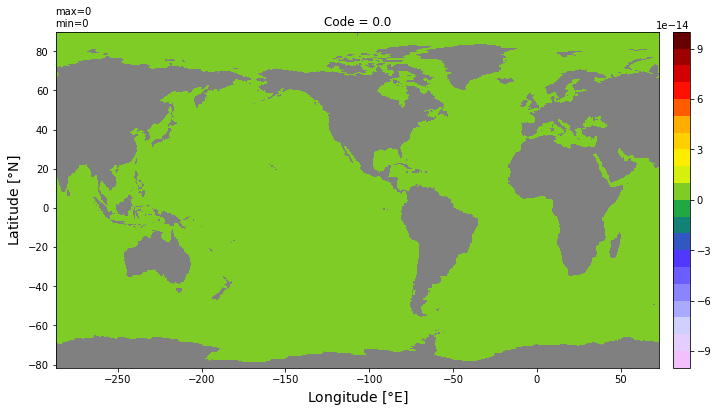

<Figure size 864x576 with 0 Axes>

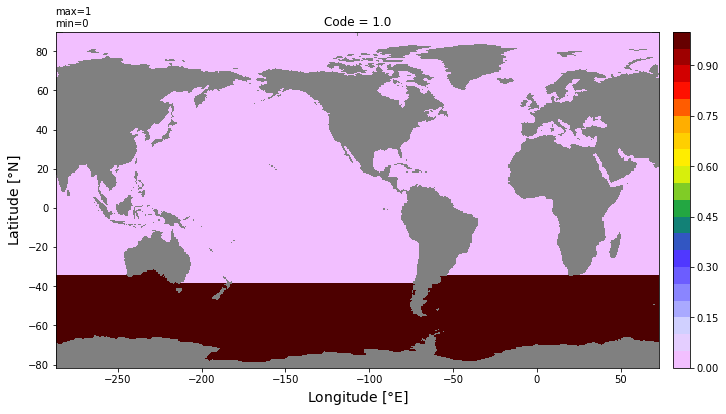

<Figure size 864x576 with 0 Axes>

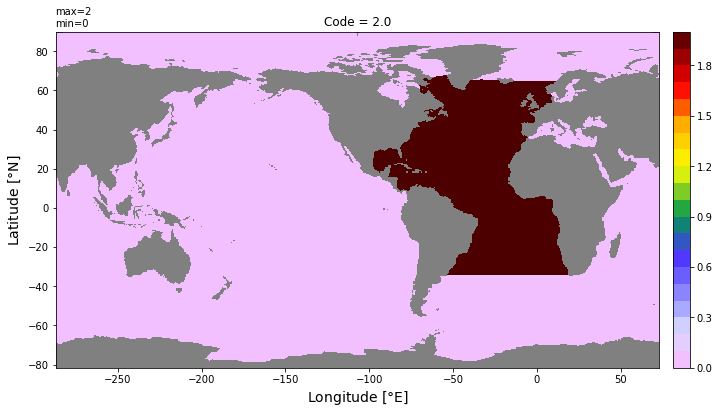

<Figure size 864x576 with 0 Axes>

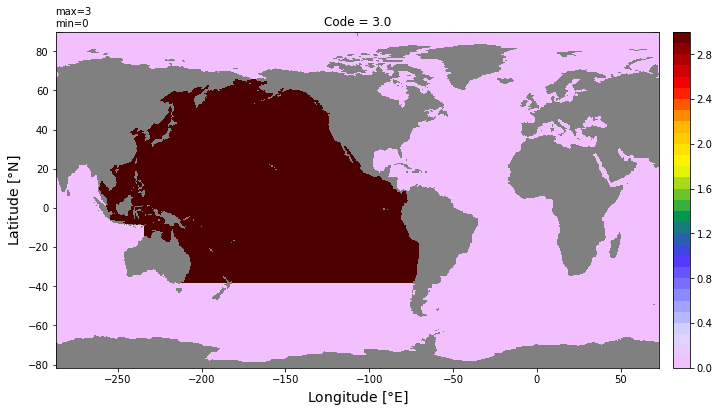

<Figure size 864x576 with 0 Axes>

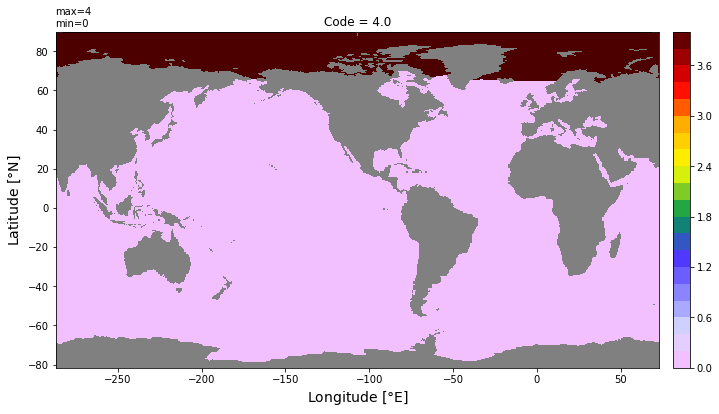

<Figure size 864x576 with 0 Axes>

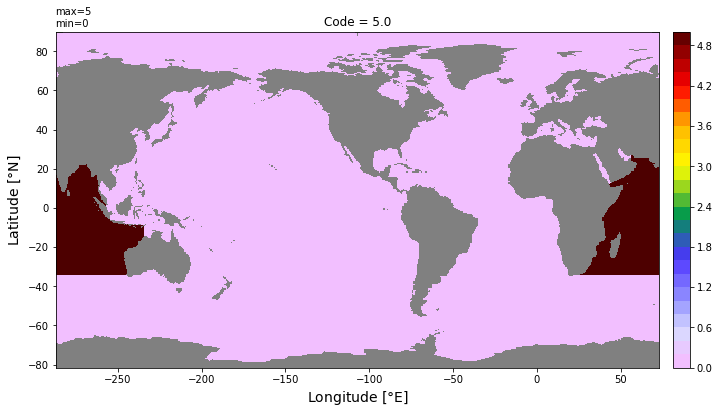

<Figure size 864x576 with 0 Axes>

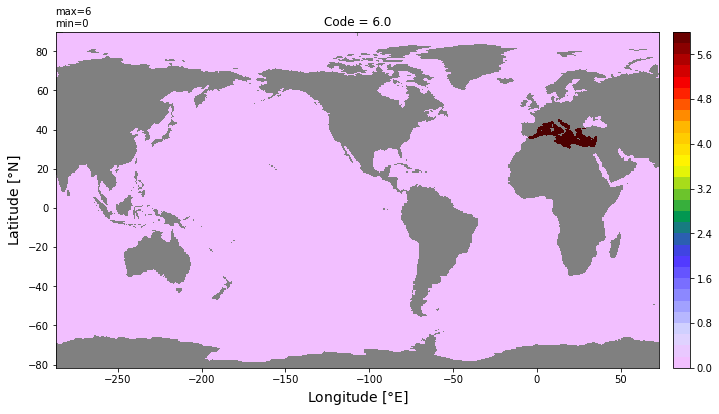

<Figure size 864x576 with 0 Axes>

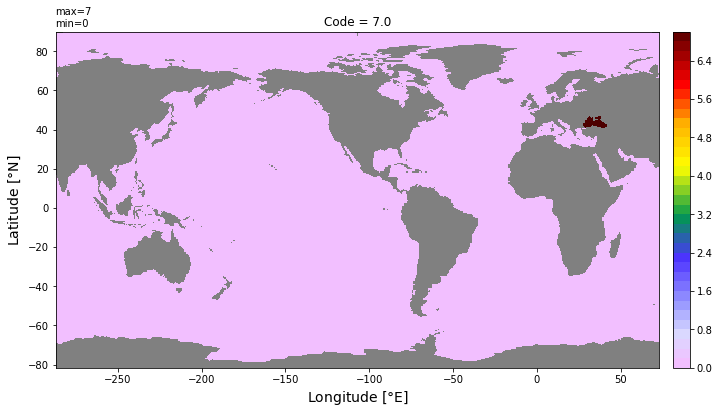

<Figure size 864x576 with 0 Axes>

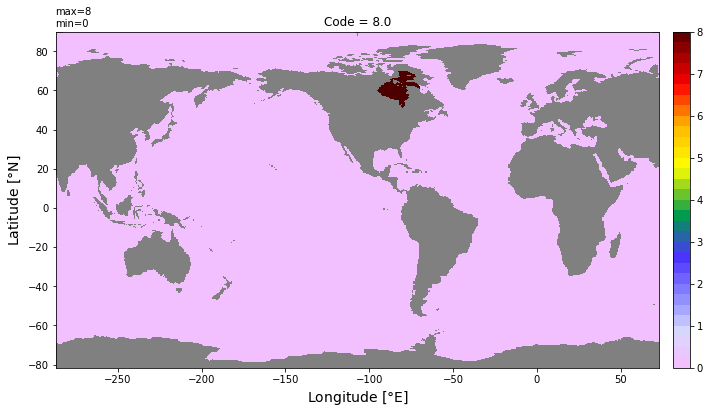

<Figure size 864x576 with 0 Axes>

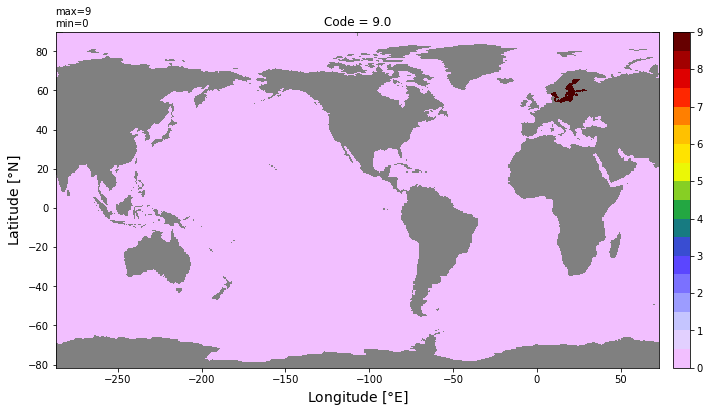

<Figure size 864x576 with 0 Axes>

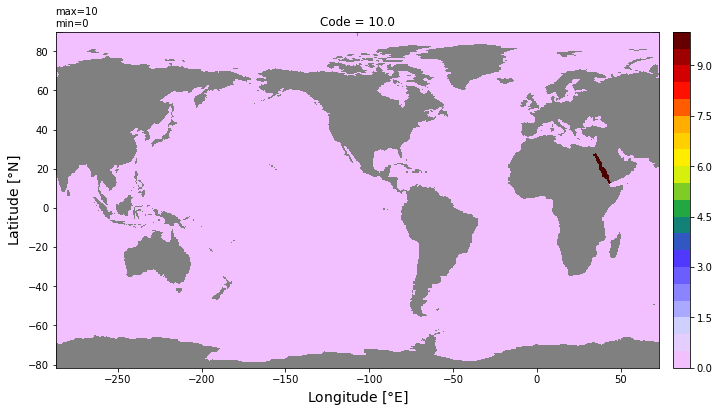

<Figure size 864x576 with 0 Axes>

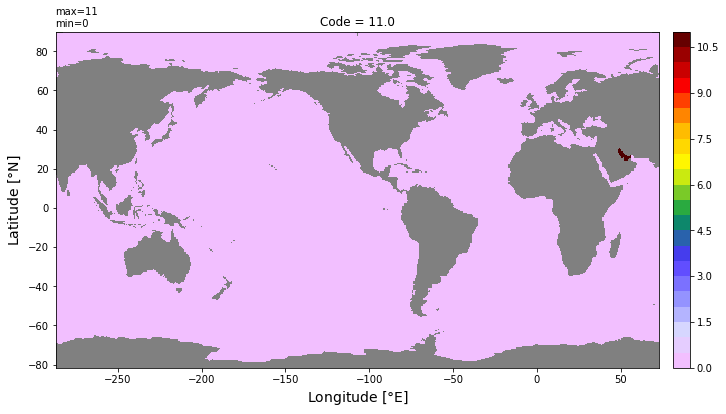

In [7]:
for v in vals:
    dummy = numpy.zeros(basin_code.shape)
    dummy[basin_code == v] = v
    dummy = numpy.ma.masked_where(depth == 0., dummy)
    plt.figure(figsize=(12,8))
    xyplot(dummy, grd.geolon, grd.geolat,title='Code = '+str(v));

### Check and plot "name" of each region defined

In [8]:
# reload codes as dataarray
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

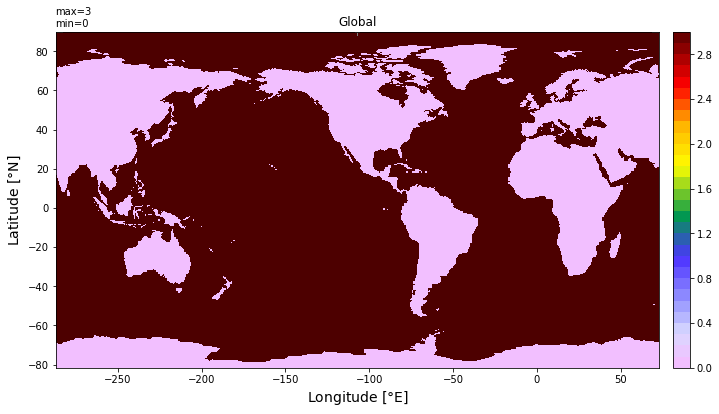

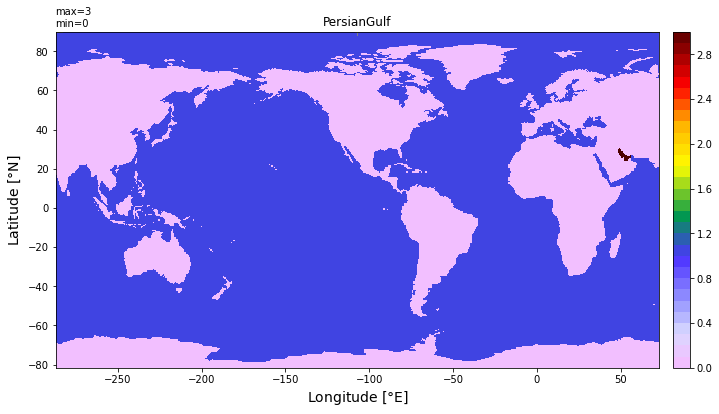

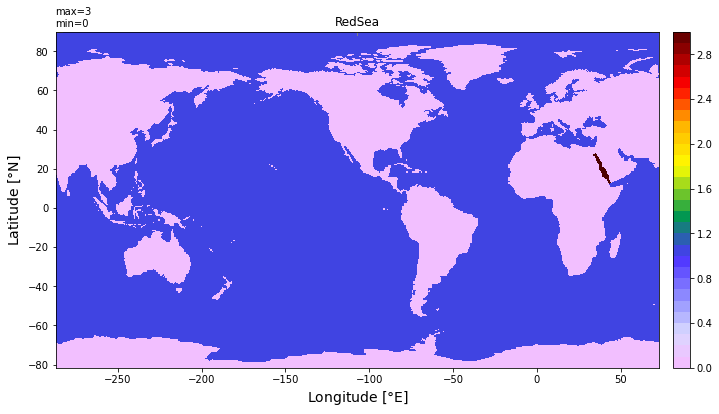

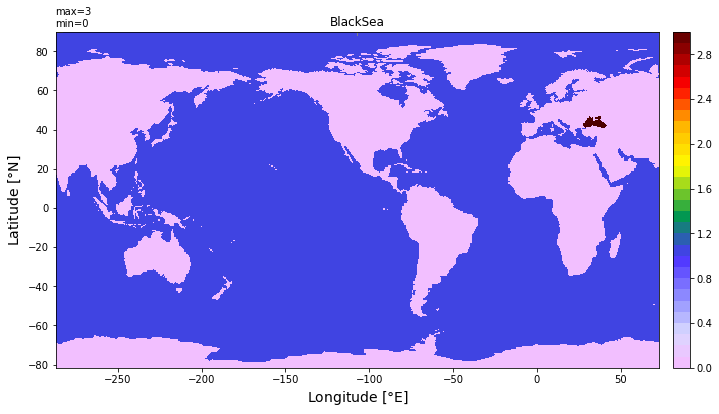

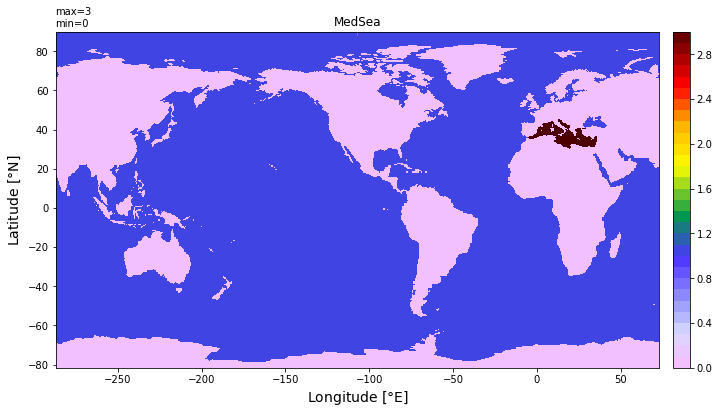

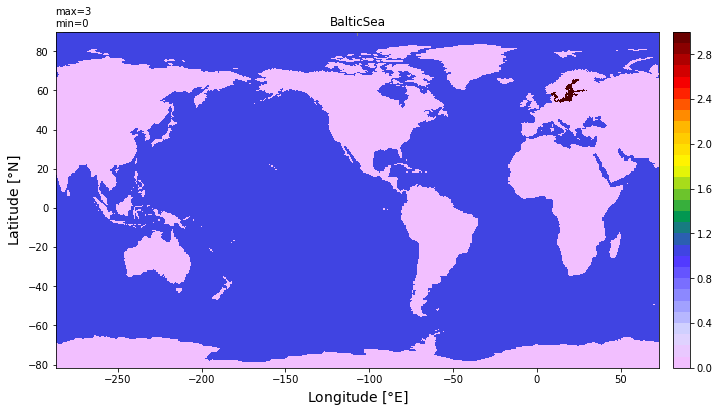

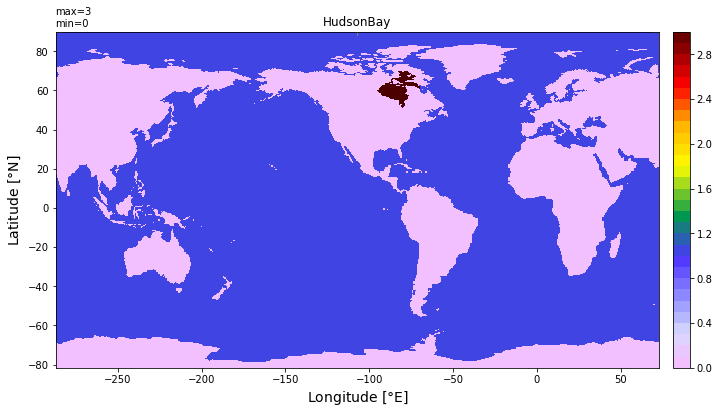

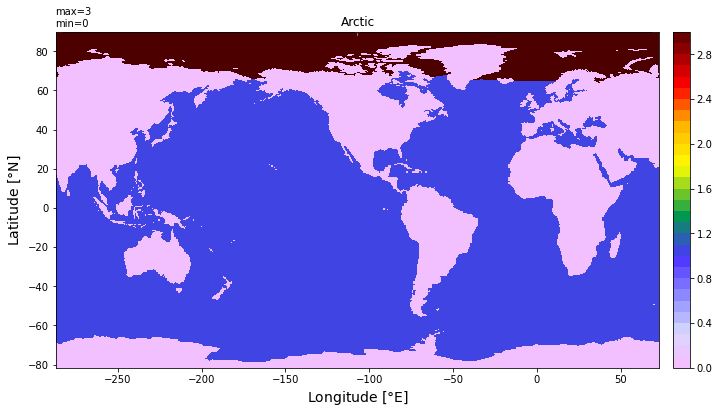

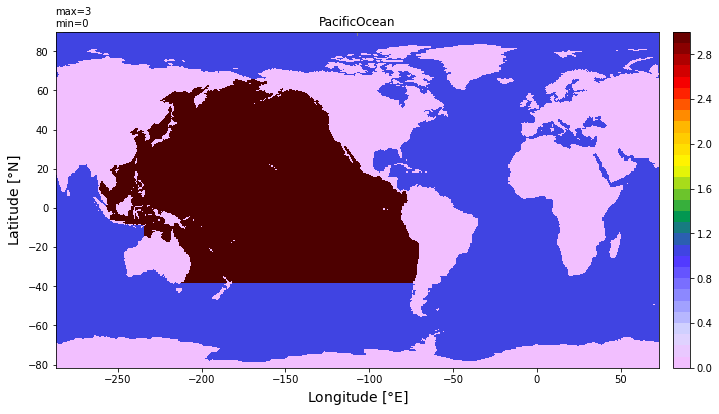

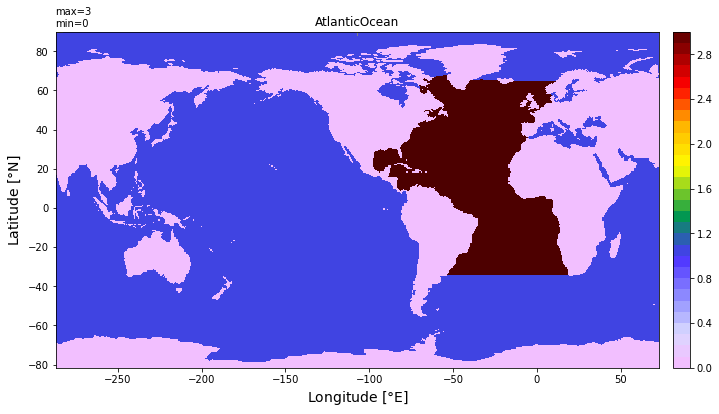

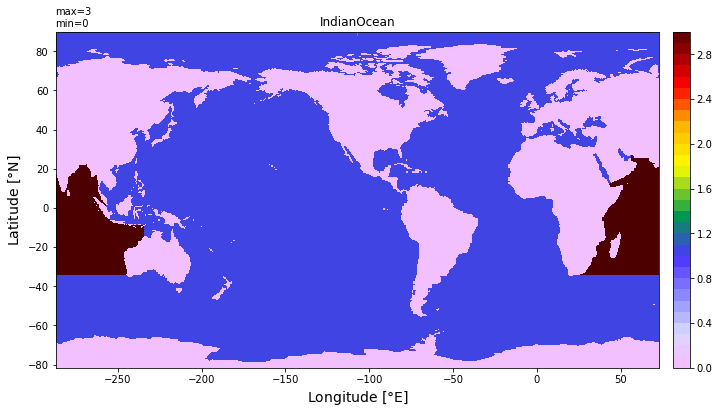

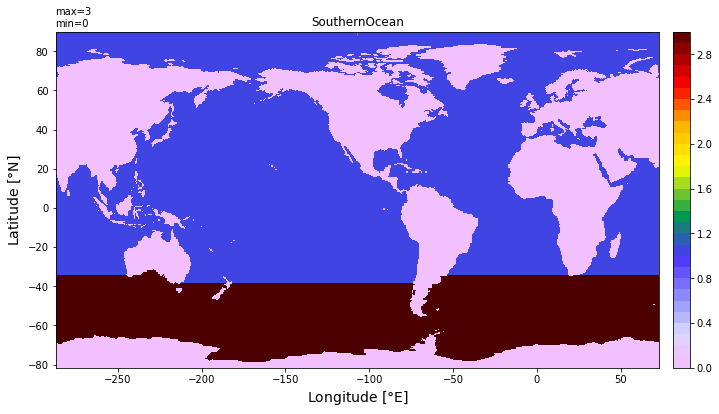

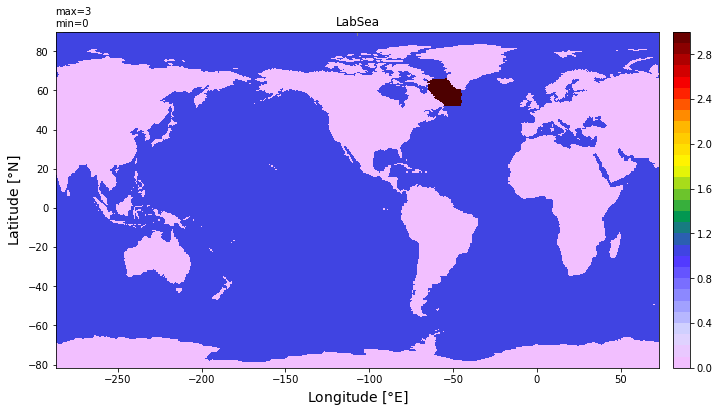

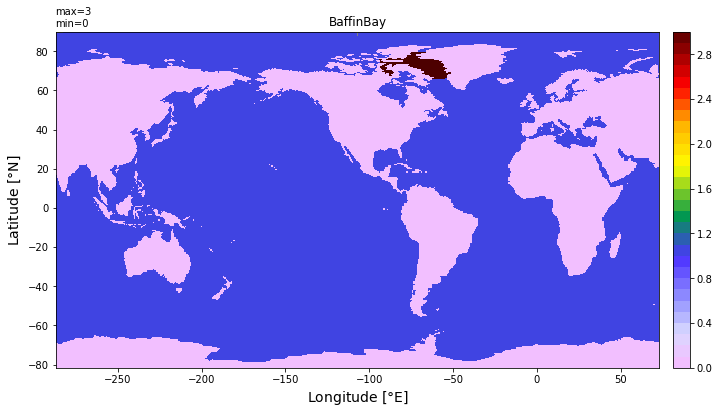

In [9]:
for r in range(len(basin_code.region)):
    #plt.figure(figsize=(12,8))
    xyplot((basin_code[0,:]+basin_code[r,:]*2).values, grd.geolon, grd.geolat,
          title=str(basin_code['region'][r].values))